In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Function to input daily expenses
def input_expenses():
    expenses = []
    while True:
        date_input = input("Enter the date (YYYY-MM-DD) or 'stop' to finish: ")
        if date_input.lower() == 'stop':
            break
        amount_input = float(input("Enter the expense amount: "))
        expenses.append({'date': date_input, 'amount': amount_input})
    return expenses

In [3]:
# Function to analyze the expenses
def analyze_expenses(expenses):
    # Create a DataFrame
    df = pd.DataFrame(expenses)
    df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
    df.set_index('date', inplace=True)  # Set date as index

    # Calculate total expenses
    total_expenses = df['amount'].sum()
    print(f"Total Expenses: ${total_expenses:.2f}")

    # Calculate daily average
    daily_average = df['amount'].mean()
    print(f"Daily Average Spending: ${daily_average:.2f}")

    # Calculate rolling mean (moving average) with a window of 3
    df['rolling_mean'] = df['amount'].rolling(window=3).mean()
    
    return df

In [4]:
# Function to plot the expenses
def plot_expenses(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['amount'], label='Daily Expenses', marker='o', linestyle='-', color='lightgray')
    plt.plot(df.index, df['rolling_mean'], label='Rolling Mean (3 Days)', color='blue', linewidth=2)
    plt.title('Daily Expenses Tracker')
    plt.xlabel('Date')
    plt.ylabel('Expense Amount ($)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Welcome to the Personal Finance Tracker!
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 1000
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 659
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 6544
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 210
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 652
Enter the date (YYYY-MM-DD) or 'stop' to finish: 2024-10-2
Enter the expense amount: 200
Enter the date (YYYY-MM-DD) or 'stop' to finish: stop
Total Expenses: $9265.00
Daily Average Spending: $1544.17


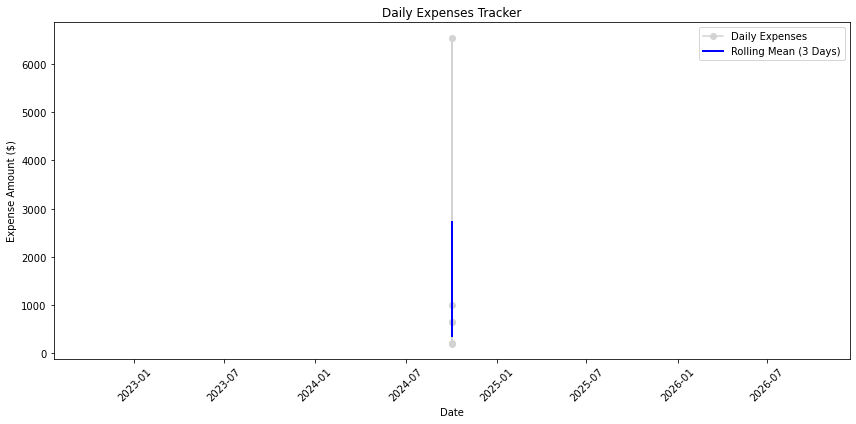

In [5]:
# Main function to run the application
def main():
    print("Welcome to the Personal Finance Tracker!")
    expenses = input_expenses()  # Input expenses from the user
    if not expenses:
        print("No expenses entered. Exiting.")
        return

    df = analyze_expenses(expenses)  # Analyze the expenses
    plot_expenses(df)  # Plot the expenses

if __name__ == '__main__':
    main()